In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
dataset = load_iris()

In [14]:
X = dataset.data
y = dataset.target
X = np.hstack([X, np.ones((y.shape[0], 1))])
W = np.zeros((X.shape[1], 3))
enc = OneHotEncoder(sparse_output=False)
y = y.reshape(-1, 1)
y_enc = enc.fit_transform(y)
y_enc

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [56]:
def training(X, y_enc, W, iters, alpha):
    costs = []
    for ite in range(iters):
        y_pred = softmax(logits(X, W))
        cost = np.mean(-np.log(y_pred[y_enc == 1]))
        new_w = np.dot(X.T, (y_pred - y_enc))
        W = W - alpha * new_w
        if (ite % 100 == 0):
            print(cost)
            costs.append(cost)
    return W, costs

In [17]:
def logits(X, W):
    return np.dot(X, W)

In [41]:
def softmax(logits):
    new_logits = logits - np.max(logits, axis = 1, keepdims = True)
    return np.exp(new_logits) / np.sum(np.exp(new_logits), axis = 1, keepdims = True)

In [74]:
new_w, costs = training(X, y_enc, W, 10000, 0.001)

1.0986122886681096
0.5852186030581582
0.27952027984228295
0.15642815912606545
0.1414880584754349
0.13076730488239643
0.12256829656579732
0.11605665220140267
0.11074146073103108
0.10630912079870015
0.10254848074399008
0.0993116803296739
0.0964918786822459
0.0940098398292754
0.09180549048287769
0.08983241356518121
0.08805414667506573
0.08644162847034931
0.08497139661958462
0.08362429045199687
0.08238450019180106
0.08123885898898323
0.08017630810931517
0.07918748763100765
0.07826441945375368
0.07740025912015298
0.0765890995647977
0.07582581449372201
0.07510593232544754
0.0744255339281636
0.07378116905164095
0.07316978756882977
0.07258868254089952
0.07203544279041559
0.07150791317294725
0.07100416112180831
0.07052244833534442
0.0700612067039056
0.0696190177509112
0.06919459500137398
0.06878676880089953
0.06839447319524257
0.06801673455004373
0.06765266164623149
0.0673014370316854
0.06696230944637241
0.06663458716803403
0.06631763214997698
0.06601085484265996
0.06571370960742202
0.065425690

In [52]:
y_pred = np.argmax(softmax(np.dot(X, new_w)), axis = 1)
np.mean(y.flatten() == y_pred) * 100

96.0

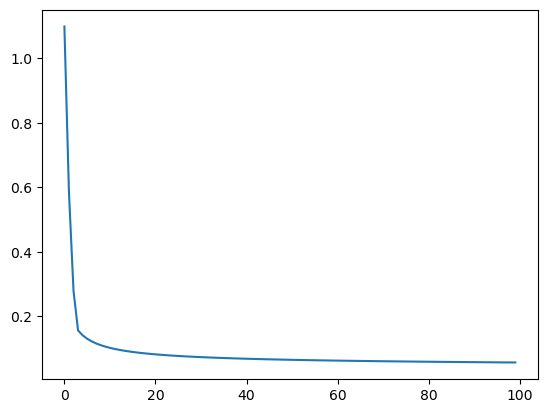

In [75]:
plt.plot(np.arange(len(costs)), costs)